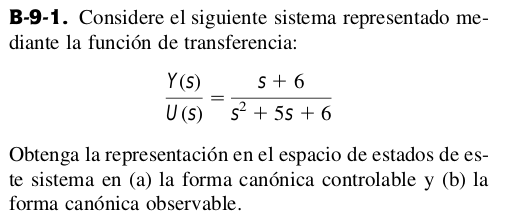

In [41]:
from control.matlab import *
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank as rank
from control import canonical_form as canon

#### Definición de la función de transferencia

In [102]:
s = tf('s')
G = (s+6)/(s**2+5*s+6)
G


    s + 6
-------------
s^2 + 5 s + 6

#### Representación en el spacio de estados

In [103]:
sys = tf2ss(G)
A, B, C, D = ssdata(sys)

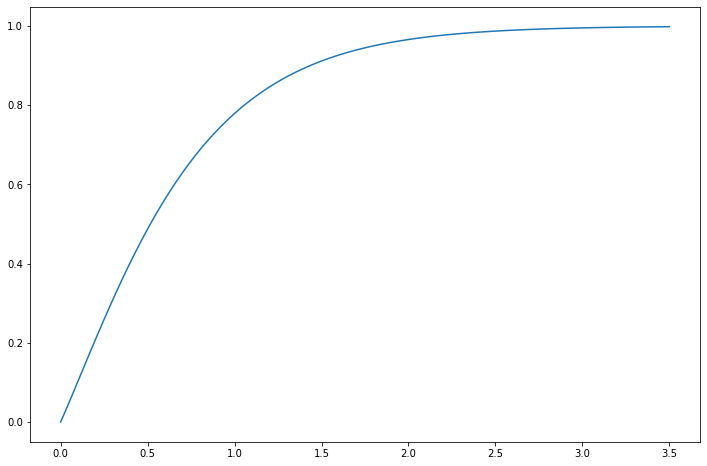

{'RiseTime': 1.3278278278278282,
 'SettlingTime': 2.2352352352352356,
 'SettlingMin': 0.8983988559919874,
 'SettlingMax': 0.9982037725182511,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.9982037725182511,
 'PeakTime': 3.500000000000001,
 'SteadyStateValue': 0.9982037725182511}

In [104]:
plt.figure(figsize = (12,8))
y, x = step(sys)
plt.plot(x,y)
plt.show()
stepinfo(sys)

In [60]:
W = ctrb(A,B)
condicion = '' if rank(W) == len(A) else ' no'
print(f'El sistema{condicion} es controlable')

El sistema es controlable


In [61]:
M = obsv(A,C)
condicion = '' if rank(M) == len(A) else ' no'
print(f'El sistema{condicion} es observable')

El sistema es observable


#### Forma canónica observable

In [62]:
csys = canon(sys,'observable')
for a in csys: print(a)

A = [[-5.  1.]
 [-6.  0.]]

B = [[1.]
 [6.]]

C = [[1. 0.]]

D = [[0.]]

[[ 1.  6.]
 [ 6. 24.]]


#### Forma canónica controlable

In [63]:
csys = canon(sys,'reachable')
for a in csys: print(a)

A = [[-5. -6.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[1. 6.]]

D = [[0.]]

[[ 1.  0.]
 [-0.  1.]]
